# Spotify Podcast Dataset - Publisher Dendrogram



In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

/Users/das/opt/anaconda3/envs/mldev/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df = pd.read_csv('../podcasts-no-audio-13GB-selected/metadata.tsv', sep='\t')

In [3]:
df.columns

Index(['show_uri', 'show_name', 'show_description', 'publisher', 'language',
       'rss_link', 'episode_uri', 'episode_name', 'episode_description',
       'duration', 'show_filename_prefix', 'episode_filename_prefix'],
      dtype='object')

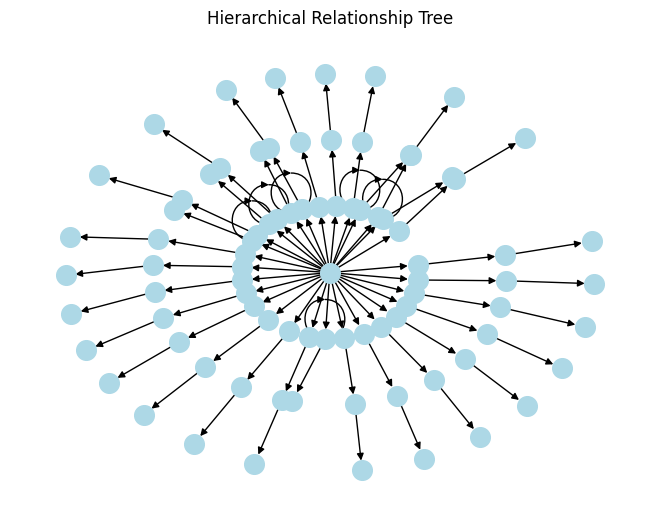

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df2 = df.iloc[:30]

# Create a directed graph (tree) using NetworkX
G = nx.DiGraph()

# Add nodes for publisher, show, and episode
#G.add_node('Publisher')

# Add edges to represent the hierarchy
for index, row in df2.iterrows():
    G.add_edge('Podcasts', row['publisher'])
    G.add_edge(row['publisher'], row['show_name'])
    G.add_edge(row['show_name'], row['episode_name'])

# Define the layout for the tree
pos = nx.kamada_kawai_layout(G)

# Draw the tree
nx.draw(G, pos, with_labels=False, node_size=200, node_color='lightblue', font_size=10, font_weight='bold')

# Customize the plot if needed
plt.title('Hierarchical Relationship Tree')
plt.axis('off')

# Show the plot
plt.show()

In [21]:
df[['publisher','show_name']].groupby(['publisher']).value_counts()

publisher                         show_name                                                                       
 Anna Dunlop                      Tea time, with Anna Dunlop                                                          2
 Bigbabyjonathan                  Bigbabyjonathan Sports podcast show                                                 1
 Breath Work Sessions             Breath Work                                                                         3
 Cool Girls Podcast               Cool Girls Podcast                                                                  2
 Hine-Kenobi                      Wild Awake                                                                          2
                                                                                                                     ..
Élan Bridges and Kayse Whitaker   Sinister, Strange, and Suspicious                                                   8
‘Nishea                           The Cozy Ro

Other references...<br>
https://observablehq.com/@ittbt/cluster-dendrogram<br>
https://observablehq.com/@d3/zoomable-treemap<br>
